In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
cruise_analysis = pd.read_csv("Cruise Director Analysis.csv")

In [3]:
cruise_analysis.shape

(1309, 10)

In [4]:
cruise_analysis.head()

ID Port of Embarkation Economic Class     Sex   Age  \
0   3      Ft. Lauderdale          Upper    Male  32.5   
1  11               Miami          Lower    Male  25.0   
2  26               Miami          Lower    Male  27.0   
3  39               Miami          Upper  Female  33.0   
4  56               Miami          Lower    Male  37.0   

   No of Siblings or Spouses on Board  No of Parents or Children on Board  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 2.0                                 0.0   

   Passenger Fare ChildFare? PurchasedPackage  
0          1480.5          N               No  
1            66.5          N              Yes  
2            55.0          N               No  
3           605.5          N              Yes  
4            55.5          N               No

In [5]:
cruise_analysis["Port of Embarkation"].replace({"Ft. Lauderdale": 0, "Miami":1, "Jacksonville":2}, inplace = True)
cruise_analysis["Economic Class"].replace({"Lower": 0, "Middle":1, "Upper":2}, inplace = True)
cruise_analysis["Sex"].replace({"Male": 0, "Female":1}, inplace = True)
cruise_analysis["ChildFare?"].replace({"N": 0, "Y":1}, inplace = True)
cruise_analysis["PurchasedPackage"].replace({"No": 0, "Yes":1}, inplace = True)

In [6]:
cruise_analysis.head()

ID  Port of Embarkation  Economic Class  Sex   Age  \
0   3                    0               2    0  32.5   
1  11                    1               0    0  25.0   
2  26                    1               0    0  27.0   
3  39                    1               2    1  33.0   
4  56                    1               0    0  37.0   

   No of Siblings or Spouses on Board  No of Parents or Children on Board  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 2.0                                 0.0   

   Passenger Fare  ChildFare?  PurchasedPackage  
0          1480.5           0                 0  
1            66.5           0                 1  
2            55.0           0                 0  
3           605.5           0                 1  
4            55.5           0                 0

In [7]:
print(cruise_analysis.isnull().any())

ID                                    False
Port of Embarkation                   False
Economic Class                        False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Passenger Fare                        False
ChildFare?                            False
PurchasedPackage                      False
dtype: bool


In [8]:
cruise_analysis.dtypes

ID                                      int64
Port of Embarkation                     int64
Economic Class                          int64
Sex                                     int64
Age                                   float64
No of Siblings or Spouses on Board    float64
No of Parents or Children on Board    float64
Passenger Fare                        float64
ChildFare?                              int64
PurchasedPackage                        int64
dtype: object

In [9]:
mean_age = cruise_analysis["Age"].mean()
print(mean_age)

29.88116634799235


In [10]:
c = cruise_analysis.Age.fillna(value = mean_age, inplace = True)
print(c)

None


In [11]:
print(cruise_analysis.isnull().any())

ID                                    False
Port of Embarkation                   False
Economic Class                        False
Sex                                   False
Age                                   False
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Passenger Fare                        False
ChildFare?                            False
PurchasedPackage                      False
dtype: bool


In [12]:
def separate_by_class(cruise_analysis):
    separated = dict()
    for i in range(len(separated)):
        vector = separated[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

In [13]:
X = cruise_analysis.drop(["PurchasedPackage", "ID"], axis = 1)
y = cruise_analysis["PurchasedPackage"]

In [14]:
def calculate_probability(X, mean, std):
    exponent = exp(-((X - mean)**2 / (2 * stdev**2)))
    return (1 / (sqrt(2 * pi) * std)) * exponent

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [17]:
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(1309, 8) (1309,)
   Port of Embarkation  Economic Class  Sex   Age  \
0                    0               2    0  32.5   
1                    1               0    0  25.0   
2                    1               0    0  27.0   
3                    1               2    1  33.0   
4                    1               0    0  37.0   

   No of Siblings or Spouses on Board  No of Parents or Children on Board  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 2.0                                 0.0   

   Passenger Fare  ChildFare?  
0          1480.5           0  
1            66.5           0  
2            55.0           0  
3           605.5           0  
4            55.5           0  
0    0
1

In [18]:
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

(809, 8) (500, 8)


In [19]:
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

0.6180290297937356 0.3819709702062643


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[137  21]
 [ 36  68]]


In [23]:
ac = accuracy_score(y_test,y_pred)
print("Accuracy Score: ", ac)

Accuracy Score:  0.7824427480916031


In [24]:
from sklearn.metrics import classification_report
clm = classification_report(y_test, y_pred)
print("Classification Matrix: \n", clm)

Classification Matrix: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       158
           1       0.76      0.65      0.70       104

    accuracy                           0.78       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.78      0.78      0.78       262



In [25]:
gaussian_results = pd.DataFrame(columns = ['Classifier','y','Accuracy','Precision','Recall','F1-Score'])

In [26]:
classifier = {"Gaussian":GaussianNB()}

In [27]:
CR = classification_report(y_test,y_pred, output_dict = True)
CR = pd.DataFrame(CR).transpose()[:2]

In [28]:
for line_number in range(0,len(CR)):
    gaussian_results = gaussian_results.append({"Classifier": classifier, "y":line_number, "Accuracy":accuracy_score(y_test, y_pred),
                                        "Precision":CR["precision"][line_number], "Recall": CR["recall"][line_number],
                                        "F1-Score": CR["f1-score"][line_number]}, ignore_index = True)

In [29]:
gaussian_results

Classifier  y  Accuracy  Precision    Recall  F1-Score
0  {'Gaussian': GaussianNB()}  0  0.782443   0.791908  0.867089  0.827795
1  {'Gaussian': GaussianNB()}  1  0.782443   0.764045  0.653846  0.704663

In [30]:
pp = cruise_analysis.loc[cruise_analysis["PurchasedPackage"] == 1]
print(pp)

        ID  Port of Embarkation  Economic Class  Sex        Age  \
1       11                    1               0    0  25.000000   
3       39                    1               2    1  33.000000   
7       76                    1               0    0  25.000000   
11     102                    1               2    1  35.000000   
15     127                    1               1    1  29.881166   
...    ...                  ...             ...  ...        ...   
1295  9923                    1               1    1  31.000000   
1296  9924                    0               2    0  56.000000   
1297  9939                    0               2    1  23.000000   
1300  9951                    1               2    1  23.000000   
1304  9966                    1               2    0  38.000000   

      No of Siblings or Spouses on Board  No of Parents or Children on Board  \
1                                    0.0                                 0.0   
3                                  

In [31]:
pp.loc[pp["Sex"] == 1]

ID  Port of Embarkation  Economic Class  Sex        Age  \
3       39                    1               2    1  33.000000   
11     102                    1               2    1  35.000000   
15     127                    1               1    1  29.881166   
18     151                    0               0    1   1.000000   
21     160                    1               0    1  26.000000   
...    ...                  ...             ...  ...        ...   
1290  9876                    1               1    1  18.000000   
1293  9906                    1               2    1  21.000000   
1295  9923                    1               1    1  31.000000   
1297  9939                    0               2    1  23.000000   
1300  9951                    1               2    1  23.000000   

      No of Siblings or Spouses on Board  No of Parents or Children on Board  \
3                                    0.0                                 0.0   
11                                   0.0                                 0.0   
15                                   0.0                                 0.0   
18                                   0.0                                 2.0   
21                                   0.0                                 0.0   
...                                  ...                                 ...   
1290                                 0.0                                 2.0   
1293                                 0.0                                 0.0   
1295                                 1.0                                 1.0   
1297                                 0.0                                 1.0   
1300                                 3.0                                 2.0   

      Passenger Fare  ChildFare?  PurchasedPackage  
3              605.5           0                 1  
11             949.4           0                 1  
15             231.0           0                 1  
18             110.2           1                 1  
21              55.5           0                 1  
...              ...         ...               ...  
1290            91.0           0                 1  
1293           185.9           0                 1  
1295           183.8           0                 1  
1297           582.1           0                 1  
1300          1841.0           0                 1  

[339 rows x 10 columns]

In [32]:
pp.loc[pp["Sex"] == 0]

ID  Port of Embarkation  Economic Class  Sex        Age  \
1       11                    1               0    0  25.000000   
7       76                    1               0    0  25.000000   
19     152                    0               2    0  36.000000   
22     162                    1               1    0   2.000000   
28     211                    1               0    0  24.000000   
...    ...                  ...             ...  ...        ...   
1266  9626                    0               2    0  29.881166   
1267  9652                    1               0    0  26.000000   
1276  9711                    0               0    0  22.000000   
1296  9924                    0               2    0  56.000000   
1304  9966                    1               2    0  38.000000   

      No of Siblings or Spouses on Board  No of Parents or Children on Board  \
1                                    0.0                                 0.0   
7                                    0.0                                 0.0   
19                                   0.0                                 1.0   
22                                   1.0                                 1.0   
28                                   0.0                                 0.0   
...                                  ...                                 ...   
1266                                 0.0                                 0.0   
1267                                 0.0                                 0.0   
1276                                 0.0                                 0.0   
1296                                 0.0                                 0.0   
1304                                 1.0                                 0.0   

      Passenger Fare  ChildFare?  PurchasedPackage  
1               66.5           0                 1  
7               53.6           0                 1  
19            3586.3           0                 1  
22             182.0           1                 1  
28              50.0           0                 1  
...              ...         ...               ...  
1266           180.2           0                 1  
1267           395.5           0                 1  
1276            50.6           0                 1  
1296           248.5           0                 1  
1304           630.0           0                 1  

[161 rows x 10 columns]

In [33]:
pp.loc[pp["No of Parents or Children on Board"] == 0]

ID  Port of Embarkation  Economic Class  Sex        Age  \
1       11                    1               0    0  25.000000   
3       39                    1               2    1  33.000000   
7       76                    1               0    0  25.000000   
11     102                    1               2    1  35.000000   
15     127                    1               1    1  29.881166   
...    ...                  ...             ...  ...        ...   
1286  9839                    1               0    1  30.000000   
1287  9843                    2               0    1  29.881166   
1293  9906                    1               2    1  21.000000   
1296  9924                    0               2    0  56.000000   
1304  9966                    1               2    0  38.000000   

      No of Siblings or Spouses on Board  No of Parents or Children on Board  \
1                                    0.0                                 0.0   
3                                    0.0                                 0.0   
7                                    0.0                                 0.0   
11                                   0.0                                 0.0   
15                                   0.0                                 0.0   
...                                  ...                                 ...   
1286                                 0.0                                 0.0   
1287                                 0.0                                 0.0   
1293                                 0.0                                 0.0   
1296                                 0.0                                 0.0   
1304                                 1.0                                 0.0   

      Passenger Fare  ChildFare?  PurchasedPackage  
1               66.5           0                 1  
3              605.5           0                 1  
7               53.6           0                 1  
11             949.4           0                 1  
15             231.0           0                 1  
...              ...         ...               ...  
1286            87.3           0                 1  
1287            54.3           0                 1  
1293           185.9           0                 1  
1296           248.5           0                 1  
1304           630.0           0                 1  

[336 rows x 10 columns]

In [34]:
pp.loc[pp["No of Siblings or Spouses on Board"] == 0]

ID  Port of Embarkation  Economic Class  Sex        Age  \
1       11                    1               0    0  25.000000   
3       39                    1               2    1  33.000000   
7       76                    1               0    0  25.000000   
11     102                    1               2    1  35.000000   
15     127                    1               1    1  29.881166   
...    ...                  ...             ...  ...        ...   
1287  9843                    2               0    1  29.881166   
1290  9876                    1               1    1  18.000000   
1293  9906                    1               2    1  21.000000   
1296  9924                    0               2    0  56.000000   
1297  9939                    0               2    1  23.000000   

      No of Siblings or Spouses on Board  No of Parents or Children on Board  \
1                                    0.0                                 0.0   
3                                    0.0                                 0.0   
7                                    0.0                                 0.0   
11                                   0.0                                 0.0   
15                                   0.0                                 0.0   
...                                  ...                                 ...   
1287                                 0.0                                 0.0   
1290                                 0.0                                 2.0   
1293                                 0.0                                 0.0   
1296                                 0.0                                 0.0   
1297                                 0.0                                 1.0   

      Passenger Fare  ChildFare?  PurchasedPackage  
1               66.5           0                 1  
3              605.5           0                 1  
7               53.6           0                 1  
11             949.4           0                 1  
15             231.0           0                 1  
...              ...         ...               ...  
1287            54.3           0                 1  
1290            91.0           0                 1  
1293           185.9           0                 1  
1296           248.5           0                 1  
1297           582.1           0                 1  

[309 rows x 10 columns]

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6060989655771906, 0.9761904761904762, 'X[2] <= 0.296\ngini = 0.47\nsamples = 1047\nvalue = [651, 396]'),
 Text(0.3683175417246175, 0.9285714285714286, 'X[1] <= 0.954\ngini = 0.308\nsamples = 672\nvalue = [544, 128]'),
 Text(0.1949104659248957, 0.8809523809523809, 'X[3] <= -1.358\ngini = 0.246\nsamples = 523\nvalue = [448, 75]'),
 Text(0.04172461752433936, 0.8333333333333334, 'X[4] <= 1.504\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.022253129346314324, 0.7857142857142857, 'X[3] <= -2.302\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.016689847009735744, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.027816411682892908, 0.7380952380952381, 'X[3] <= -1.532\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.016689847009735744, 0.6904761904761905, 'X[0] <= -0.744\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.011126564673157162, 0.6428571428571429, 'X[4] <= 0.016\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.00556

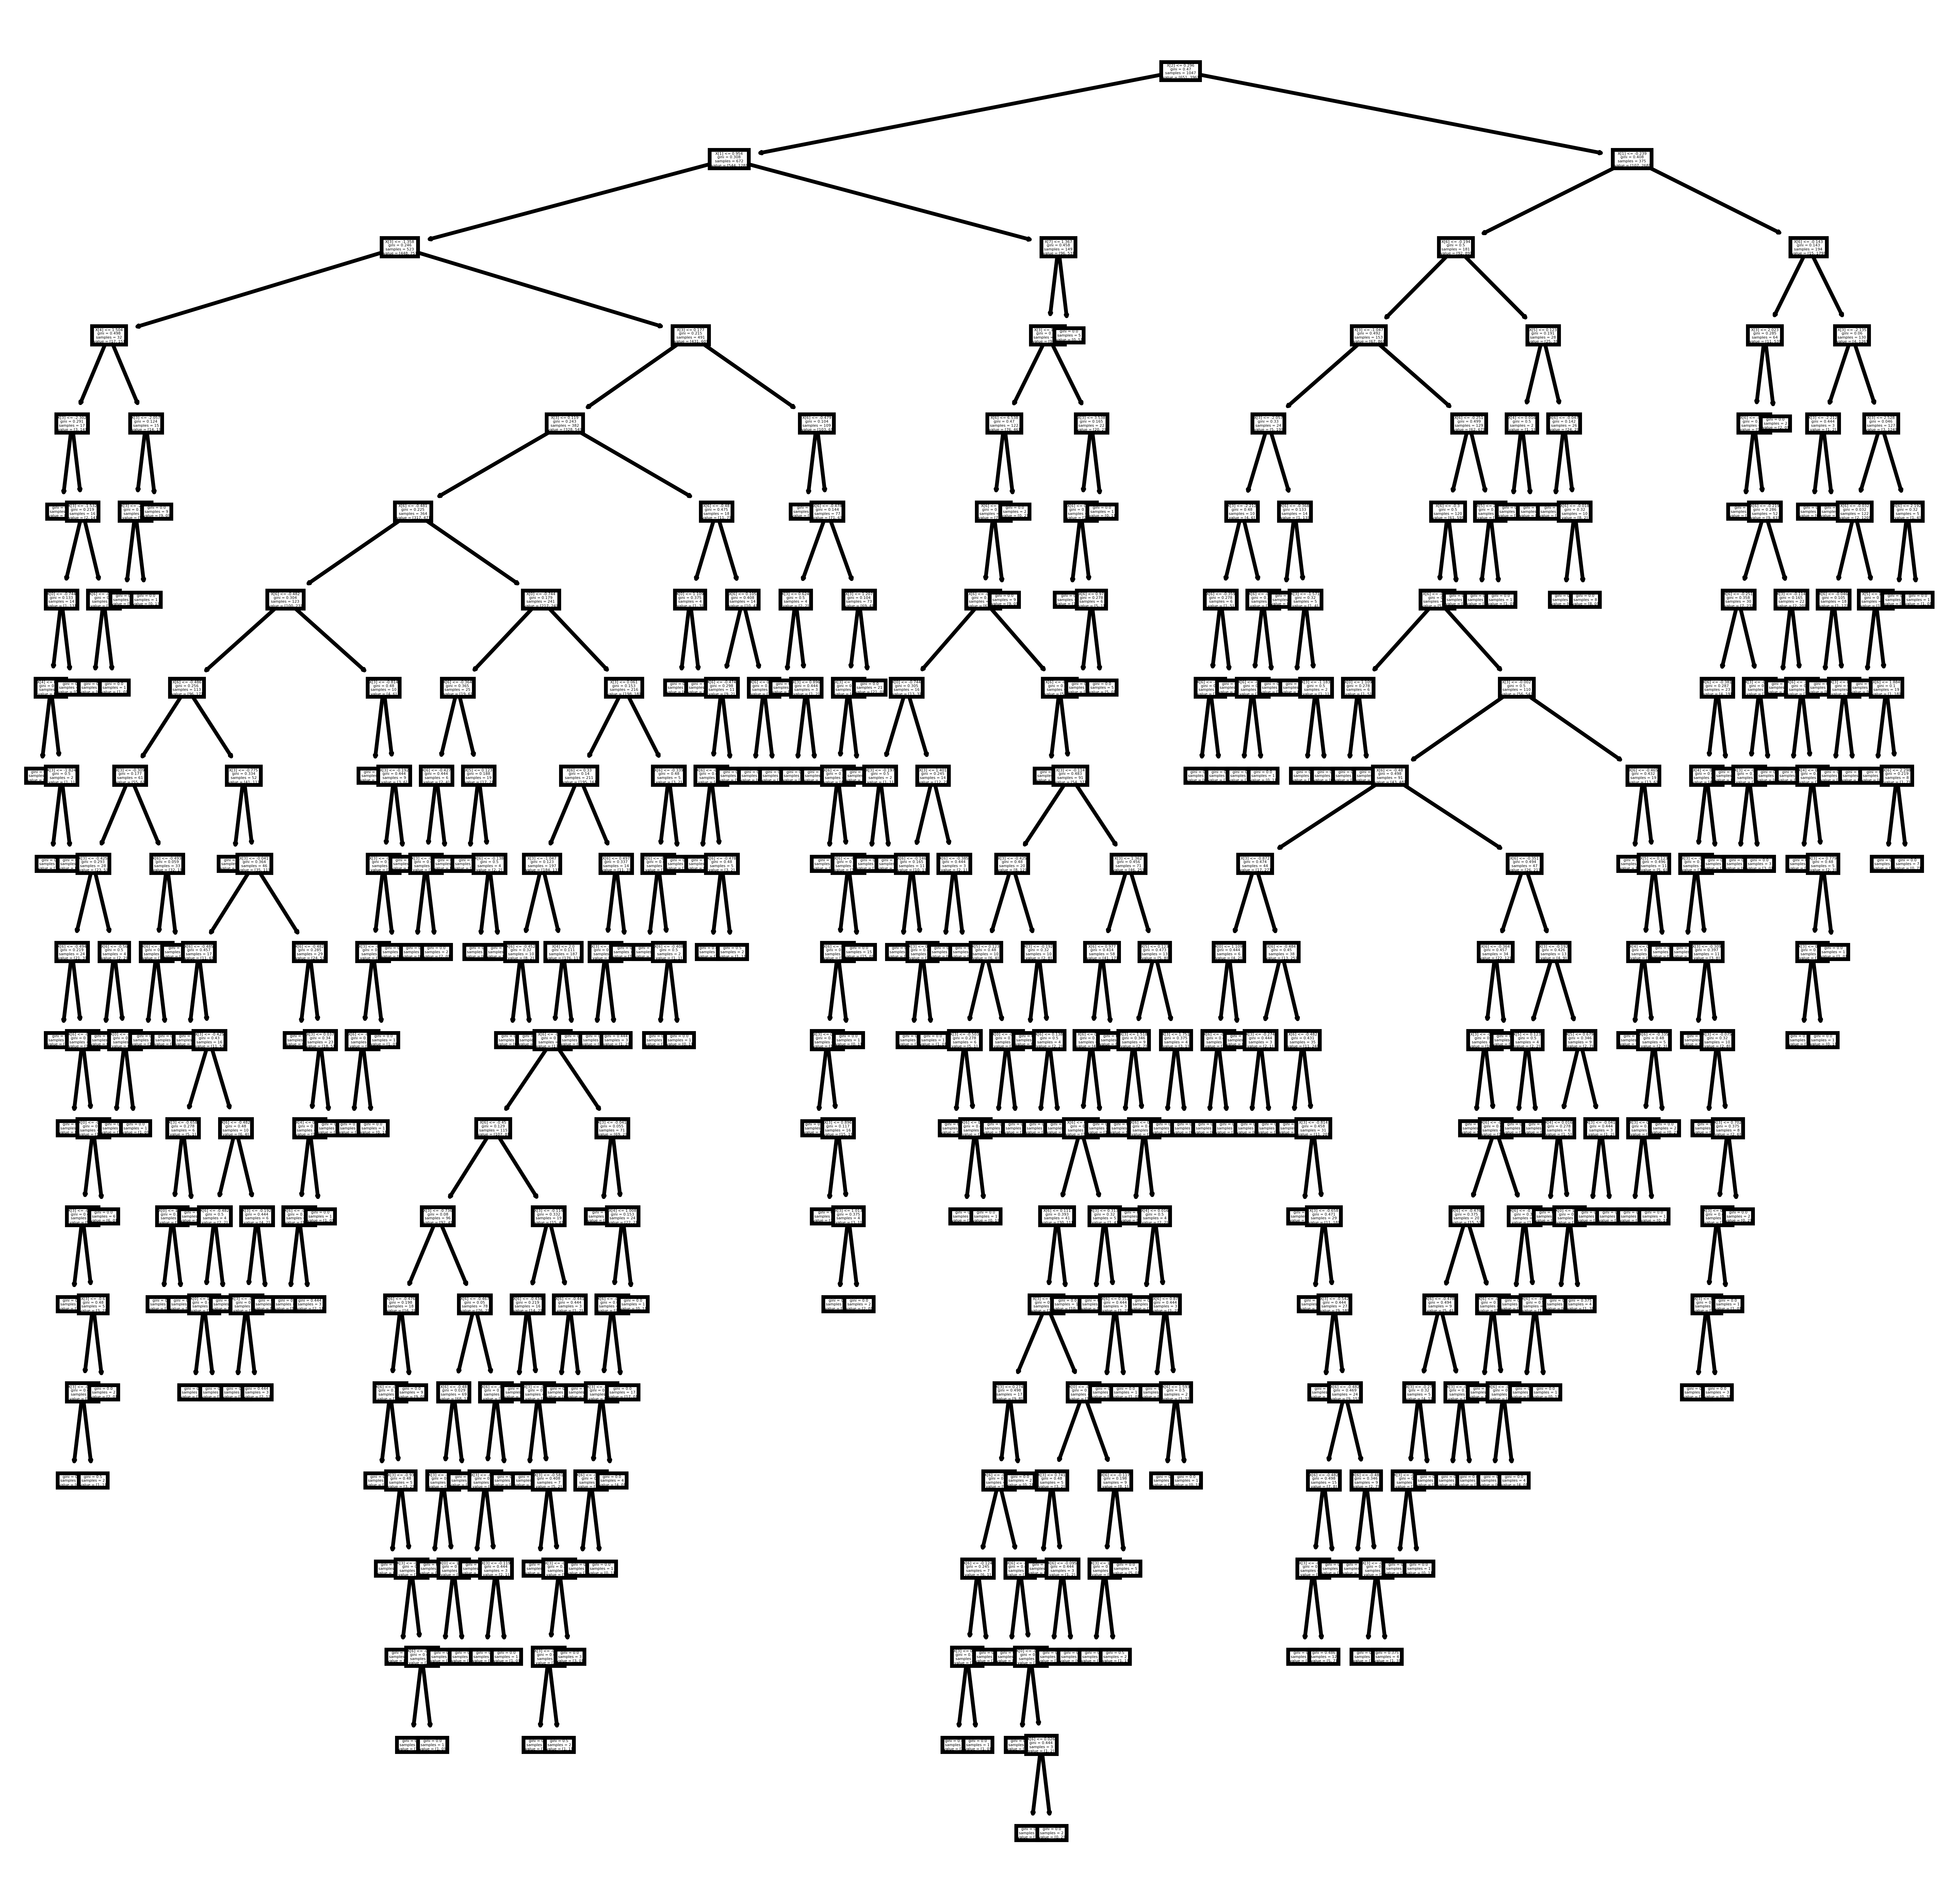

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,9), dpi=800)
tree.plot_tree(dtc)

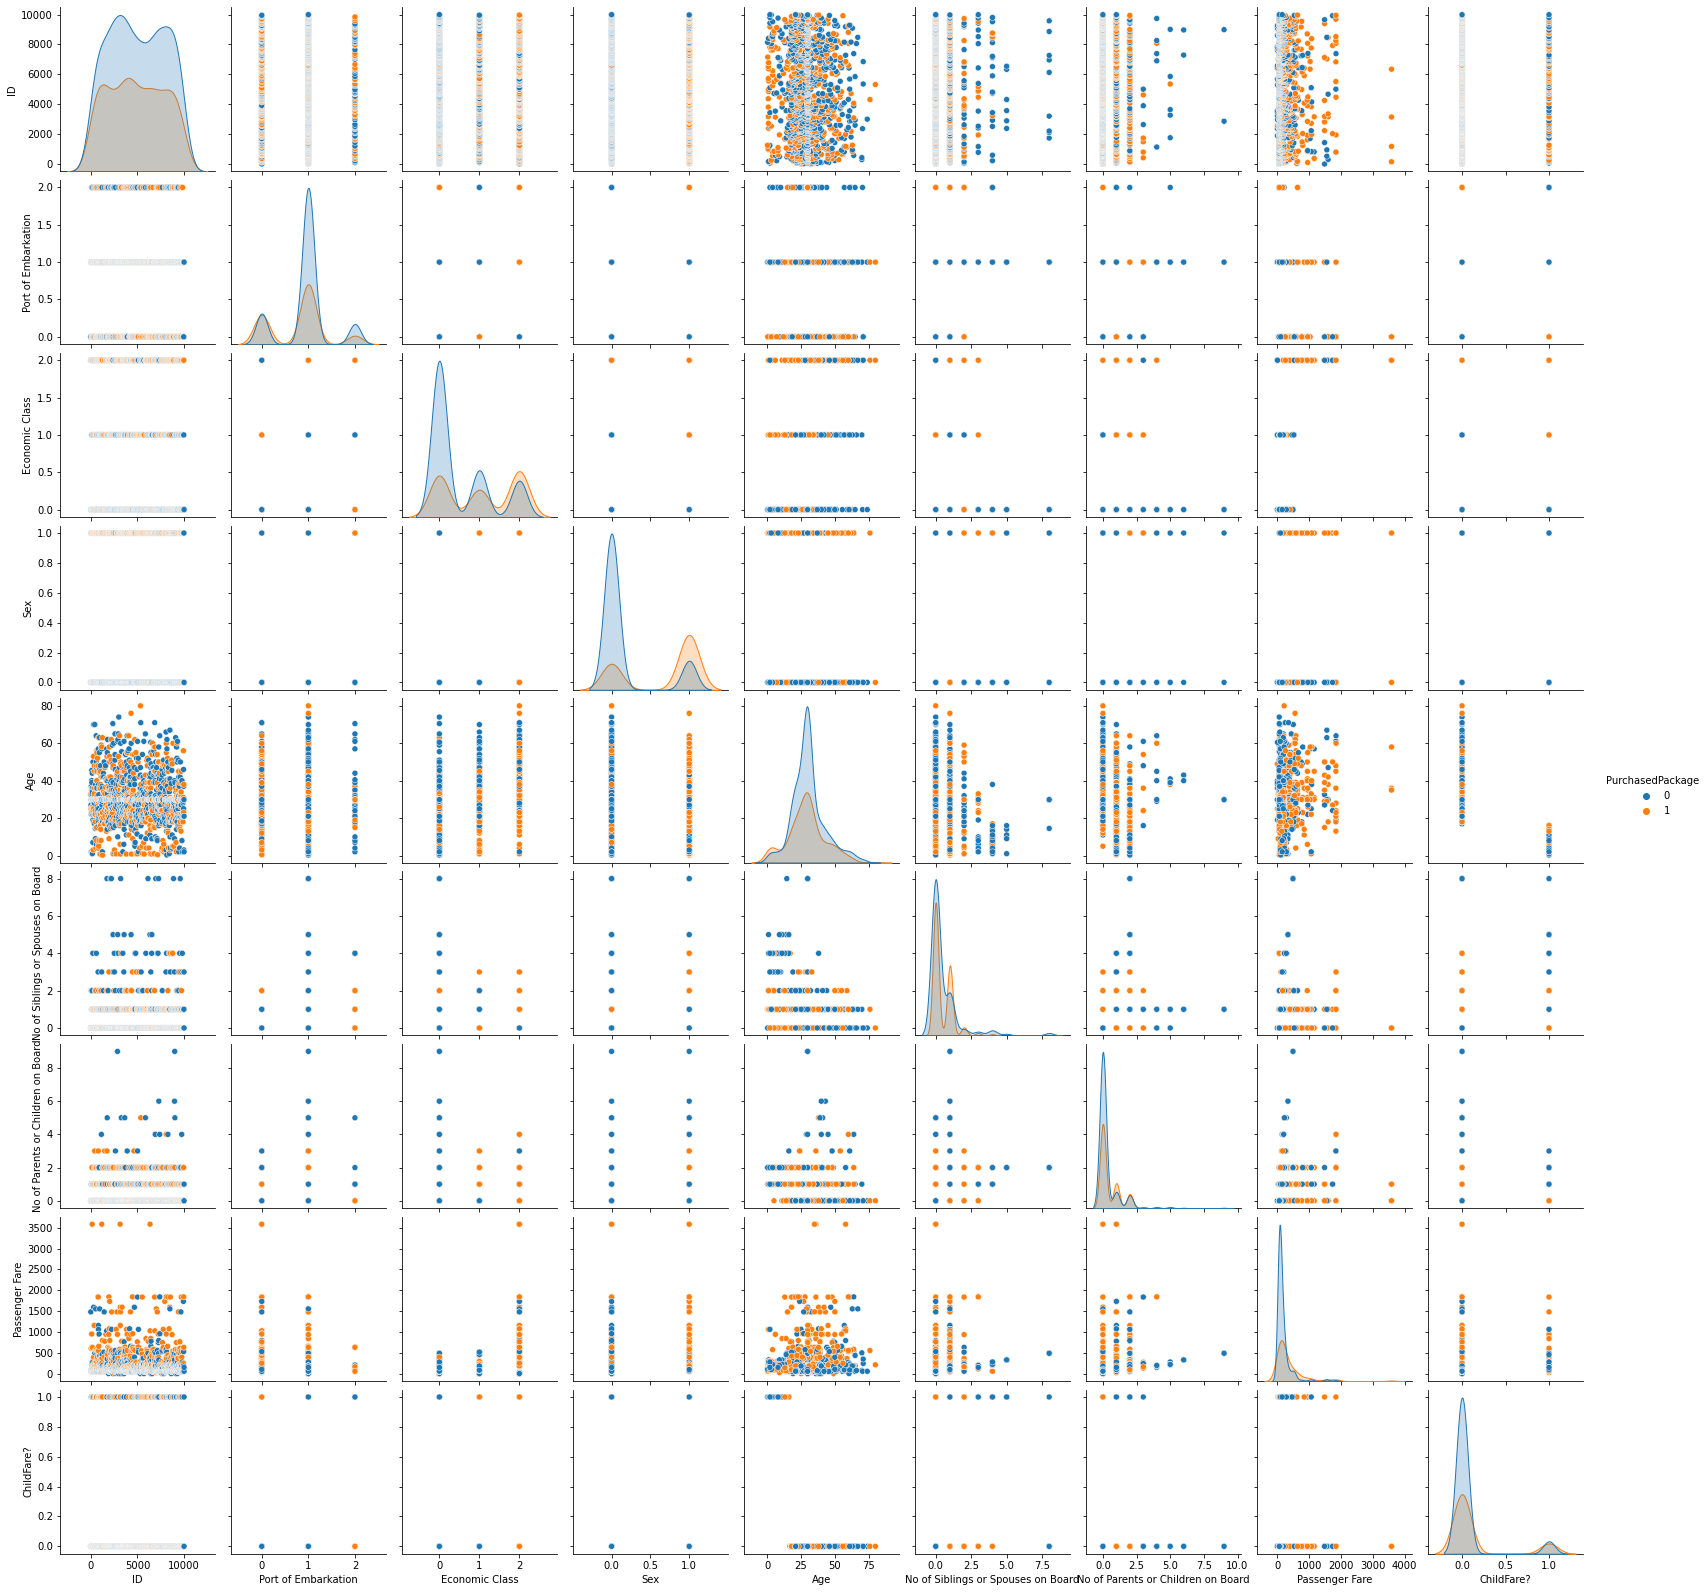

In [39]:
sns.pairplot(cruise_analysis, hue = "PurchasedPackage")

<AxesSubplot:>

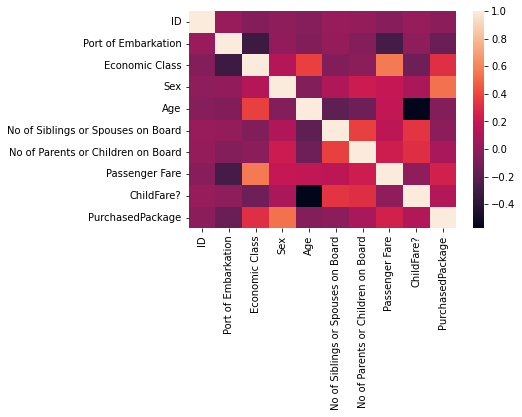

In [40]:
sns.heatmap(cruise_analysis.corr())

In [41]:
target = cruise_analysis["PurchasedPackage"]
ca = cruise_analysis.copy()
ca = ca.drop("PurchasedPackage", axis = 1)

In [42]:
X = ca

In [43]:
target

0       0
1       1
2       0
3       1
4       0
       ..
1304    1
1305    0
1306    0
1307    0
1308    0
Name: PurchasedPackage, Length: 1309, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [45]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
y = target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1047, 9)
Testing split input-  (262, 9)


In [48]:
dtc.fit(X_train,y_train)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


In [49]:
y_pred = dtc.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75       151
           1       0.67      0.58      0.62       111

    accuracy                           0.70       262
   macro avg       0.69      0.68      0.68       262
weighted avg       0.70      0.70      0.69       262



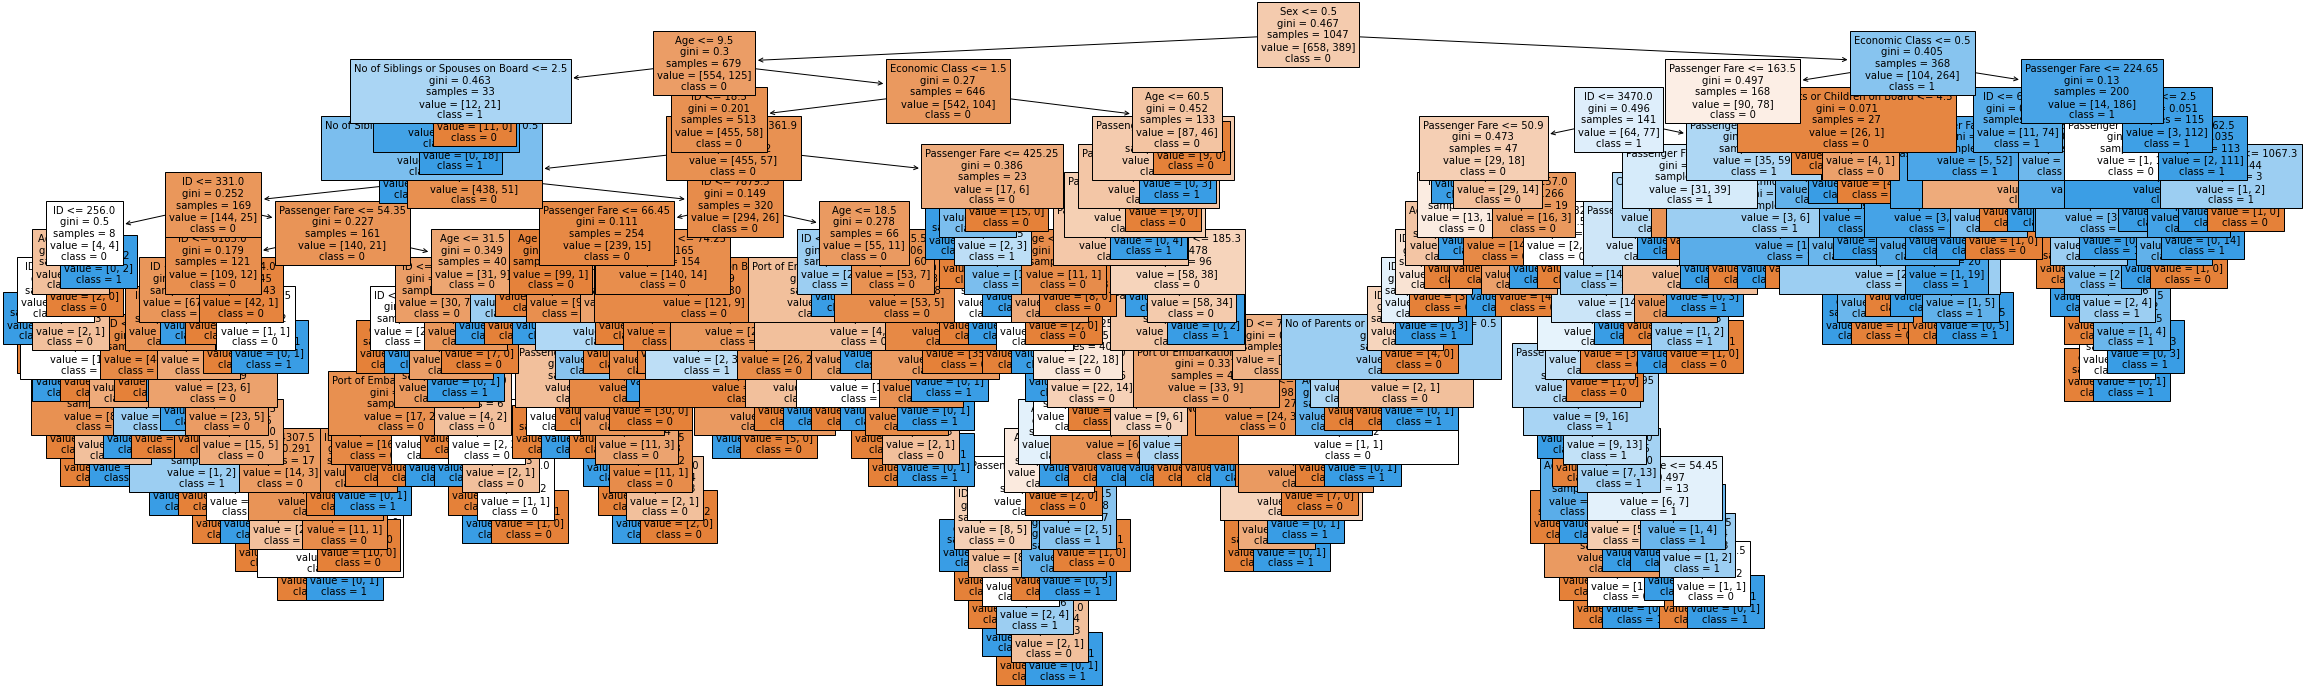

In [50]:
plt.figure(figsize = (40, 12))
dtree = plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1",], filled = True, fontsize = 10)

In [51]:
from sklearn import metrics
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7290076335877863


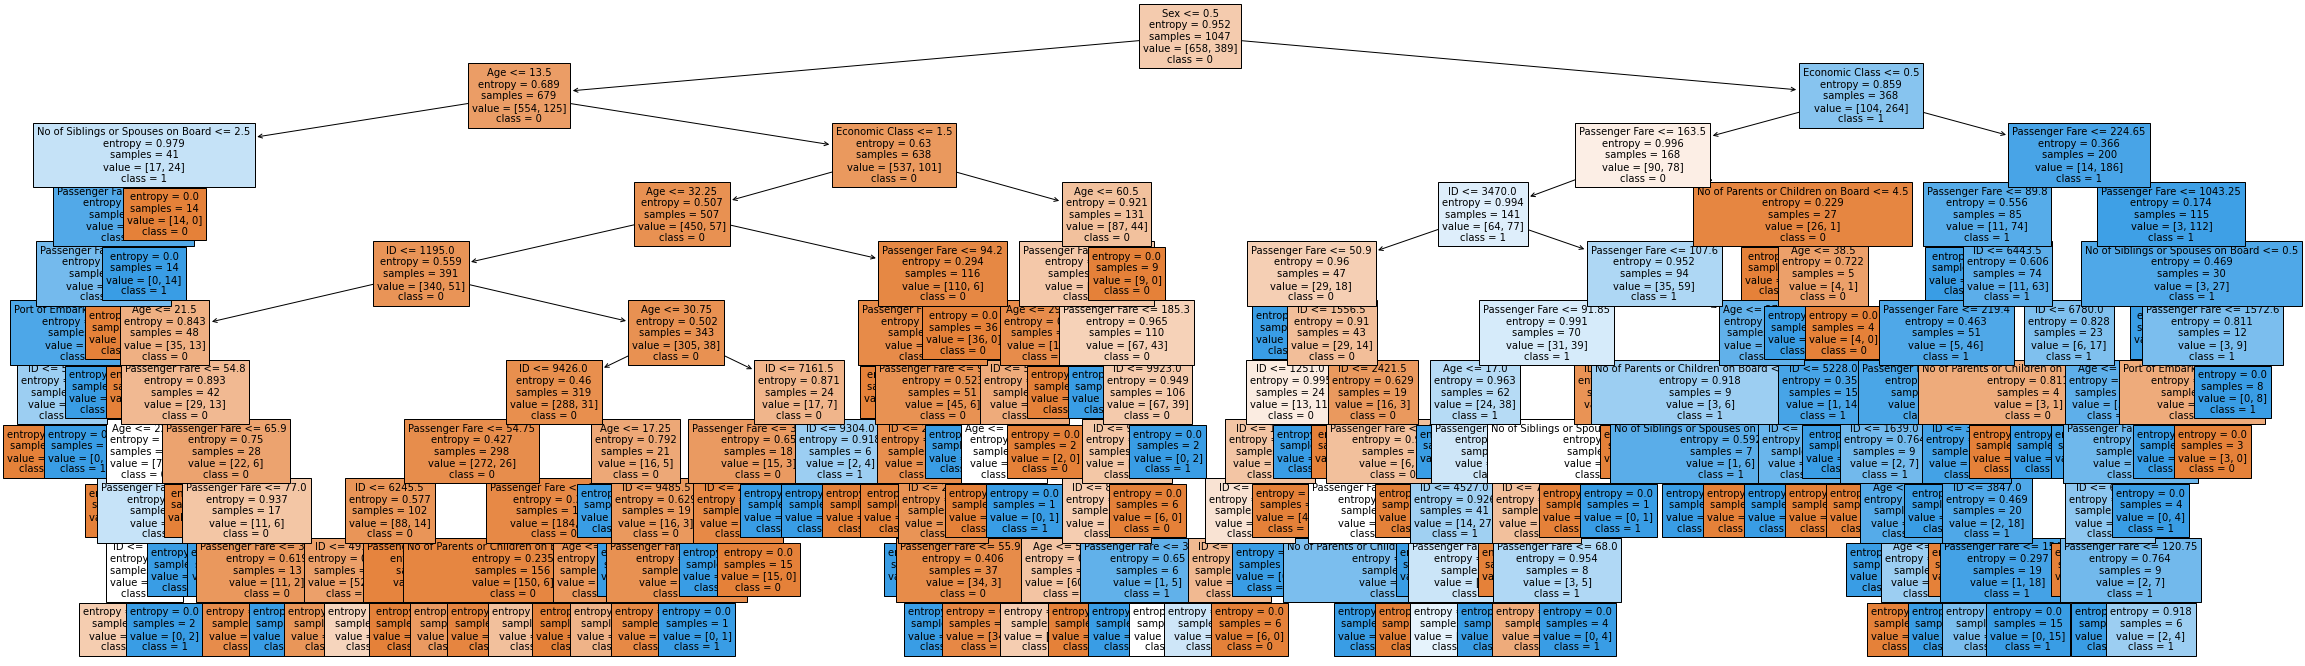

In [52]:
plt.figure(figsize = (40, 12))
dtree = plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1"], filled = True, fontsize = 10)

In [53]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7633587786259542


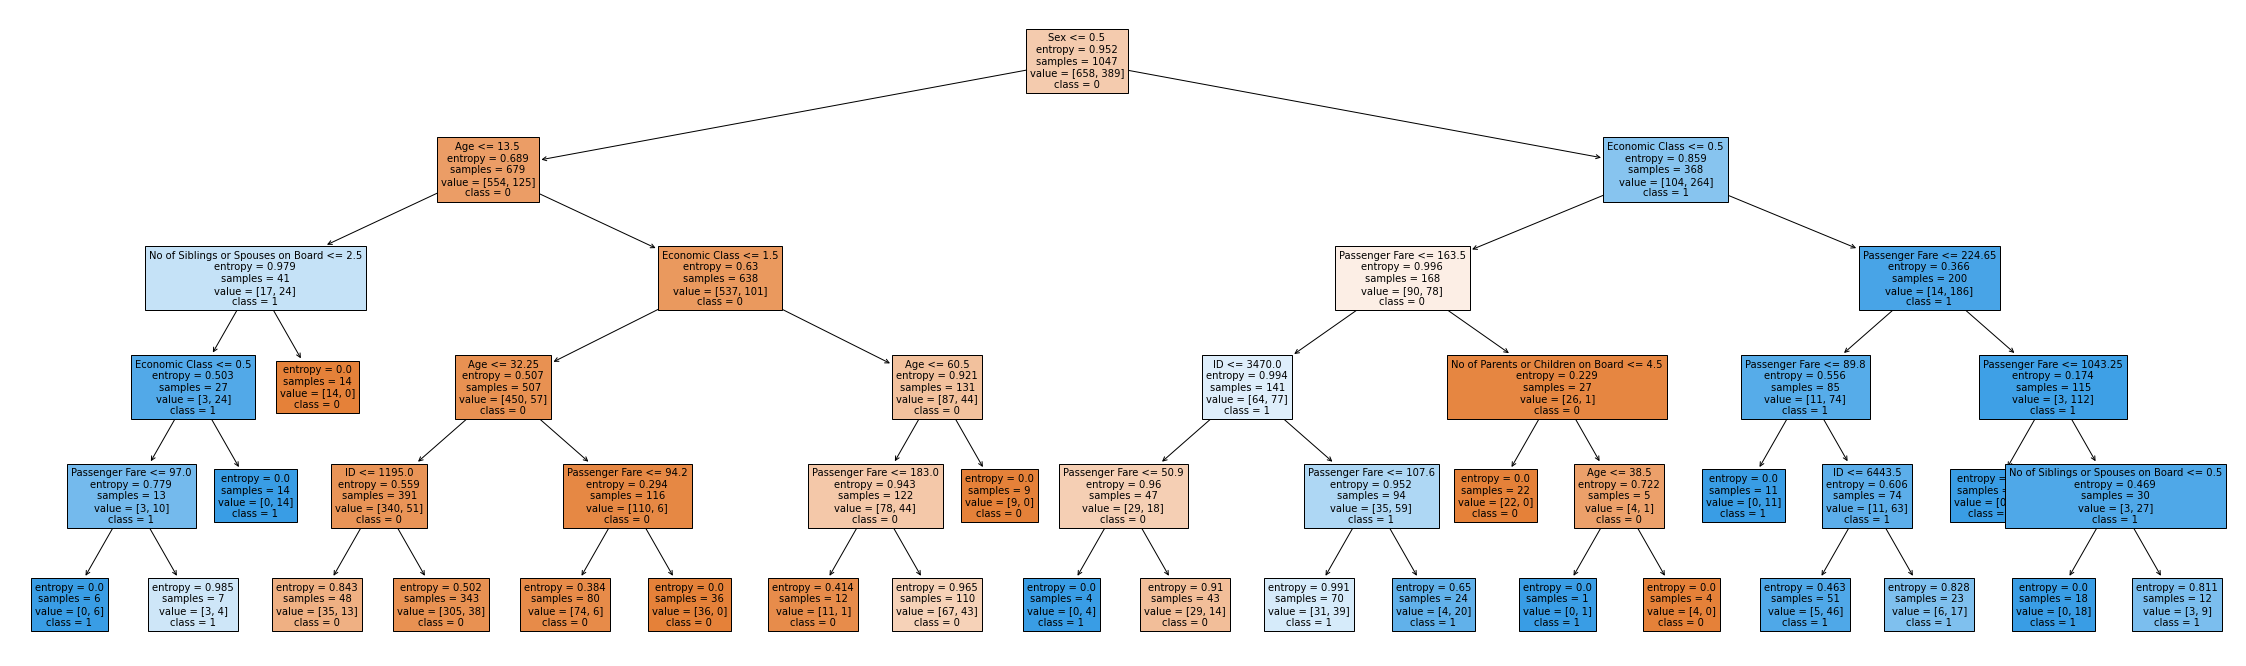

In [54]:
plt.figure(figsize = (40, 12))
dtree = plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1"], filled = True, fontsize = 10)

In [55]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7824427480916031


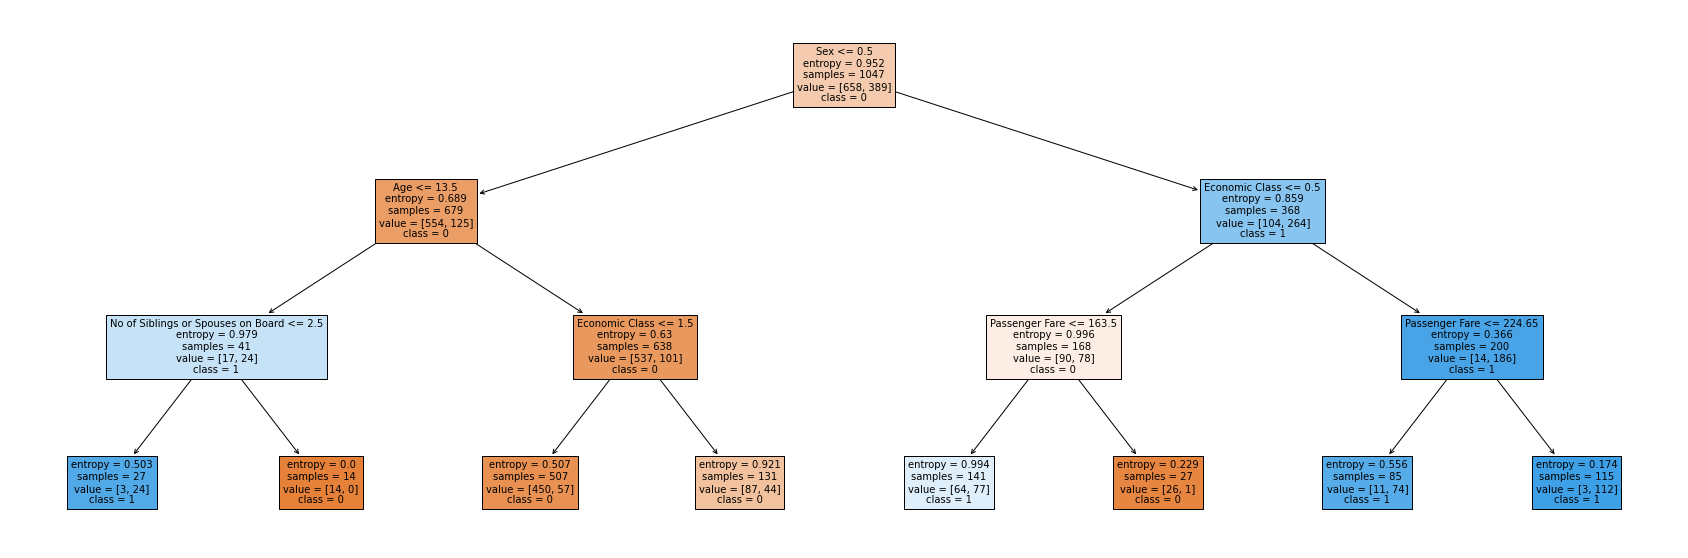

In [56]:
plt.figure(figsize = (30, 10))
dtree = plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1"], filled = True, fontsize = 10)